In [ ]:
from unet import *
from cust_dataset import *
from utils import *
import torch
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import random_split
import lightning as L
from dataset import SegmentationImageDataset
from pytorch_lightning.loggers import CSVLogger
from torch.utils.data import DataLoader

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data = SegmentationImageDataset('/content/drive/MyDrive/unet_segmentation_project/data/images', '/content/drive/MyDrive/unet_segmentation_project/data/masks', transform_img, transform_label)

In [9]:
data[0][0].shape, data[0][1].shape

(torch.Size([3, 400, 400]), torch.Size([1, 400, 400]))

In [10]:
train, val, test = random_split(data, [0.5, 0.2, 0.3])

In [ ]:
train_dataloader = DataLoader(train, batch_size=8, shuffle=True, num_workers=2, persistent_workers=True)
val_dataloader = DataLoader(val, batch_size=1, shuffle=False)
test_dataloader = DataLoader(test, batch_size=1, shuffle=False)

In [44]:
model = LitUnet()
csv_logger = CSVLogger("logs", name="unet")
trainer = L.Trainer(max_epochs=10, log_every_n_steps=10, logger=csv_logger, enable_checkpointing=False)
trainer.fit(model=model, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name | Type | Params | Mode 
--------------------------------------
0 | net  | Unet | 31.0 M | train
--------------------------------------
31.0 M    Trainable params
0         Non-trainable params
31.0 M    Total params
124.174   Total estimated model params size (MB)
54        Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name | Type | Params | Mode 
--------------------------------------
0 | net  | Unet | 31.0 M | train
--------------------------------------
31.0 M    Trainable params
0         Non-trainable params
31.0 M    Total params
124.174

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [47]:
trainer.save_checkpoint("/content/drive/MyDrive/unet_segmentation_project/trained_unet.ckpt")

In [48]:
trainer.test(model, test_dataloader)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │     0.971939742565155     │
│          test_f1          │    0.7288743257522583     │
│         test_loss         │    0.06227423995733261    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.06227423995733261,
  'test_accuracy': 0.971939742565155,
  'test_f1': 0.7288743257522583}]

In [63]:
model.eval()
a_pred = (model.net.forward(test[0][0].unsqueeze(0)) > 0.5).detach()
a = test[0][1].permute(1,2,0)
a_pred = torchvision.transforms.functional.resize(a_pred, (a.shape[0], a.shape[1]))

In [64]:
a.shape, a_pred.shape

(torch.Size([400, 400, 1]), torch.Size([1, 1, 400, 400]))

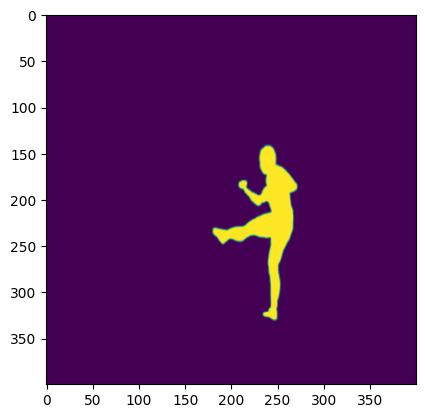

In [65]:
plt.imshow(a)

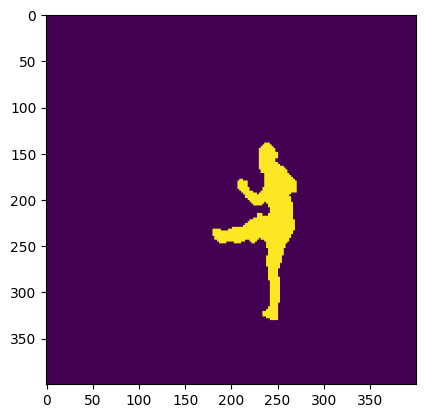

In [66]:

plt.imshow(a_pred[0].permute(1,2,0))